### Данная тетрадка подготовлена Степаном Зиминым (tg @smzimin) и используется с его согласия. 

# Financial data sources


## Content


- Stock market data sources
    - Yahoo Finance
        - Daily data
        - Daily returns
        - Dividends and Stock splits
        - Intraday data
    - Finam
        - (Raw) Intraday data for long period
        - Data preprocessing
    - Finnhub
        - Nice API
        - Different types of data: estimates, news etc.
    
    
- Bond market data sources
    - Finam and Cbonds
        - Calendar of payments
        - Clean and dirty price
    - Bloomberg
        - A lot of historical quotes
        - Price and yield-to-maturity


In [1]:
import numpy as np
import pandas as pd
from datetime import datetime, date
import time

import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use("bmh")
plt.rcParams['font.family'] = 'DejaVu Sans'

import warnings
warnings.filterwarnings("ignore")

# Stock market data sources

## Yahoo Finance

https://finance.yahoo.com/quote/TSLA/

#### Install and import yfinance library

In [2]:
# !pip install yfinance

import yfinance as yf

#### Get daily data for Apple stock by specifying the stock ticker, start date, and end date

In [8]:
prices = yf.download(
    tickers='TSLA',
    start='2015-01-01',
    end='2022-03-22',
)

prices.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-12-31,44.618000,45.136002,44.450001,44.481998,44.481998,11487500
2015-01-02,44.574001,44.650002,42.652000,43.862000,43.862000,23822000
2015-01-05,42.910000,43.299999,41.431999,42.018002,42.018002,26842500
2015-01-06,42.012001,42.840000,40.841999,42.256001,42.256001,31309500
2015-01-07,42.669998,42.956001,41.956001,42.189999,42.189999,14842000


#### Plot daily prices

We'll use `Adjusted Close` to account for dividends and stock splits. Yahoo finance accounts for stock splits even in their `Close` price. However, some other data vendors don't (e.g. *Finam*). Pay attention.

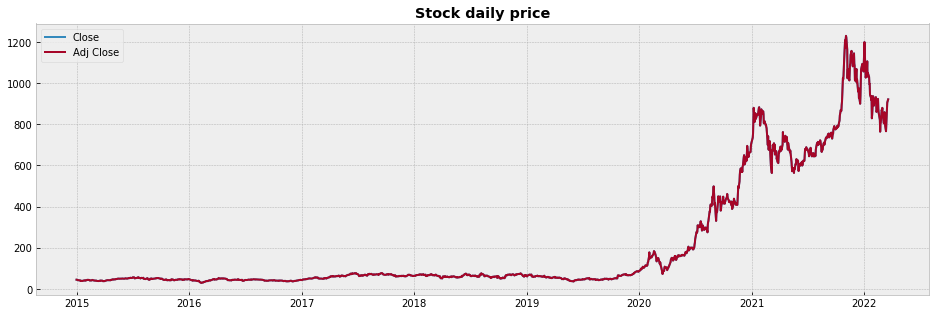

In [13]:
plot_fields =  ['Close', 'Adj Close']

fig = plt.figure(figsize=(16, 5))

plt.plot(prices[plot_fields])
plt.legend(plot_fields)

plt.title("Stock daily price", weight="bold")

plt.show()

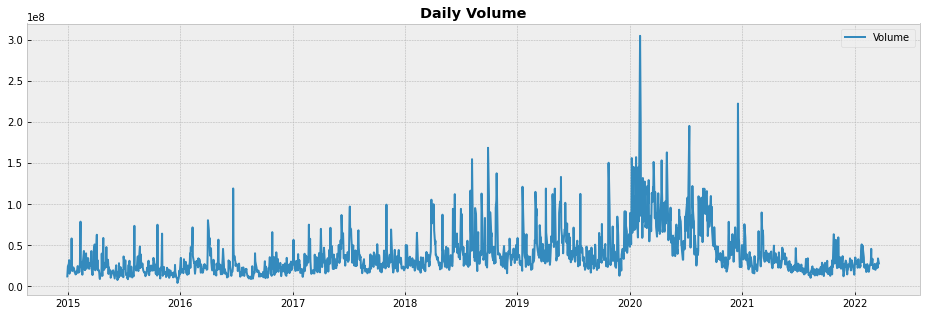

In [10]:
plot_fields =  ['Volume']

fig = plt.figure(figsize=(16, 5))

plt.plot(prices[plot_fields])
plt.legend(plot_fields)

plt.title("Daily Volume", weight="bold")

plt.show()

We convert datetime index to period

In [6]:
print(prices.index)

prices.index = prices.index.to_period(freq='d')

print(prices.index)

DatetimeIndex(['2019-12-31', '2020-01-02', '2020-01-03', '2020-01-06',
               '2020-01-07', '2020-01-08', '2020-01-09', '2020-01-10',
               '2020-01-13', '2020-01-14',
               ...
               '2022-03-08', '2022-03-09', '2022-03-10', '2022-03-11',
               '2022-03-14', '2022-03-15', '2022-03-16', '2022-03-17',
               '2022-03-18', '2022-03-21'],
              dtype='datetime64[ns]', name='Date', length=560, freq=None)
PeriodIndex(['2019-12-31', '2020-01-02', '2020-01-03', '2020-01-06',
             '2020-01-07', '2020-01-08', '2020-01-09', '2020-01-10',
             '2020-01-13', '2020-01-14',
             ...
             '2022-03-08', '2022-03-09', '2022-03-10', '2022-03-11',
             '2022-03-14', '2022-03-15', '2022-03-16', '2022-03-17',
             '2022-03-18', '2022-03-21'],
            dtype='period[D]', name='Date', length=560)


In [7]:
price = prices['Adj Close']

price.head()

Date
2019-12-31    83.666000
2020-01-02    86.052002
2020-01-03    88.601997
2020-01-06    90.307999
2020-01-07    93.811996
Freq: D, Name: Adj Close, dtype: float64

We can calculate absolute difference in prices, logarithmic returns and arithmetic returns

In [11]:
dX = price.diff()

ret = price.pct_change()

ret_log = np.log(price).diff()

ret

Date
2019-12-31         NaN
2020-01-02    0.028518
2020-01-03    0.029633
2020-01-06    0.019255
2020-01-07    0.038801
                ...   
2022-03-14   -0.036437
2022-03-15    0.046348
2022-03-16    0.047812
2022-03-17    0.037335
2022-03-18    0.038768
Freq: D, Name: Adj Close, Length: 559, dtype: float64

In [12]:
ret = ret.dropna()

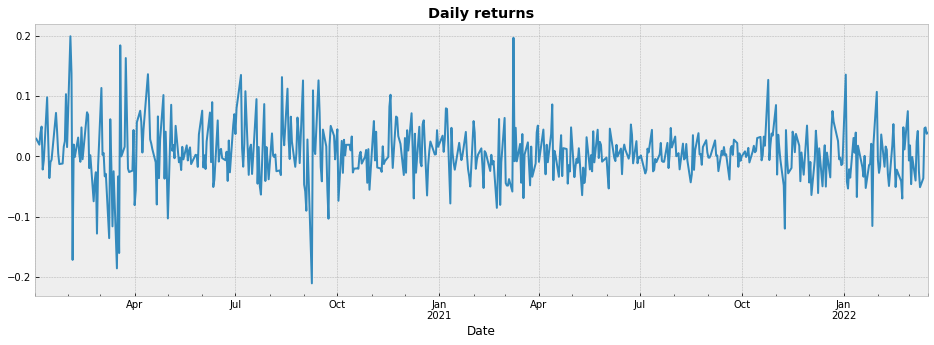

In [13]:
fig = plt.figure(figsize=(16, 5))

ret.plot()
plt.title("Daily returns", weight="bold")

plt.show()

#### Get daily data + information about Dividends	Stock Splits

In [16]:
prices = yf.download(
    tickers='TSLA',
    start='2020-01-01',
    end='2022-03-20',
    actions=True
)

prices.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits
Date,,,,,,,,
2019-12-31,81.000000,84.258003,80.416000,83.666000,83.666000,51428500,0,0.0
2020-01-02,84.900002,86.139999,84.342003,86.052002,86.052002,47660500,0,0.0
2020-01-03,88.099998,90.800003,87.384003,88.601997,88.601997,88892500,0,0.0
2020-01-06,88.094002,90.311996,88.000000,90.307999,90.307999,50665000,0,0.0
2020-01-07,92.279999,94.325996,90.671997,93.811996,93.811996,89410500,0,0.0


<AxesSubplot:xlabel='Date'>

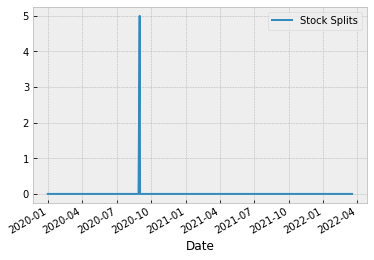

In [17]:
prices[['Stock Splits']].plot()

#### Intraday data

In [18]:
prices_intraday = yf.download(
    'TSLA', 
    period='5d', 
    interval='1m'
)

prices_intraday.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Datetime,,,,,,
2022-03-14 09:30:00-04:00,780.609985,787.000000,778.099976,779.772095,779.772095,1218725
2022-03-14 09:31:00-04:00,779.140015,779.200012,773.000000,777.413818,777.413818,222497
2022-03-14 09:32:00-04:00,777.260071,777.440002,769.695007,770.636597,770.636597,187105
2022-03-14 09:33:00-04:00,770.744995,772.679993,763.046326,764.762817,764.762817,216136
2022-03-14 09:34:00-04:00,764.059998,767.000000,761.000000,761.619995,761.619995,185366


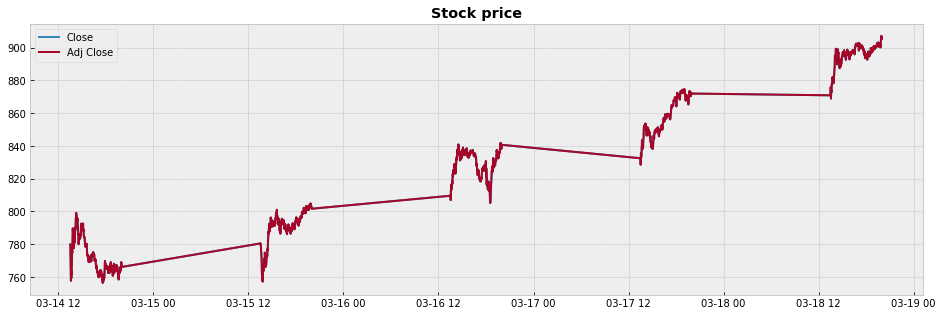

In [19]:
plot_fields =  ['Close', 'Adj Close']

fig = plt.figure(figsize=(16, 5))

plt.plot(prices_intraday[plot_fields])
plt.legend(plot_fields)

plt.title("Stock price", weight="bold")

plt.show()

In [20]:
prices_intraday.index

DatetimeIndex(['2022-03-14 09:30:00-04:00', '2022-03-14 09:31:00-04:00',
               '2022-03-14 09:32:00-04:00', '2022-03-14 09:33:00-04:00',
               '2022-03-14 09:34:00-04:00', '2022-03-14 09:35:00-04:00',
               '2022-03-14 09:36:00-04:00', '2022-03-14 09:37:00-04:00',
               '2022-03-14 09:38:00-04:00', '2022-03-14 09:39:00-04:00',
               ...
               '2022-03-18 15:51:00-04:00', '2022-03-18 15:52:00-04:00',
               '2022-03-18 15:53:00-04:00', '2022-03-18 15:54:00-04:00',
               '2022-03-18 15:55:00-04:00', '2022-03-18 15:56:00-04:00',
               '2022-03-18 15:57:00-04:00', '2022-03-18 15:58:00-04:00',
               '2022-03-18 15:59:00-04:00', '2022-03-18 16:00:00-04:00'],
              dtype='datetime64[ns, America/New_York]', name='Datetime', length=1948, freq=None)

In [21]:
prices_intraday.index.date

array([datetime.date(2022, 3, 14), datetime.date(2022, 3, 14),
       datetime.date(2022, 3, 14), ..., datetime.date(2022, 3, 18),
       datetime.date(2022, 3, 18), datetime.date(2022, 3, 18)],
      dtype=object)

In [22]:
prices_intraday.index.time

array([datetime.time(9, 30), datetime.time(9, 31), datetime.time(9, 32),
       ..., datetime.time(15, 58), datetime.time(15, 59),
       datetime.time(16, 0)], dtype=object)

In [26]:
idx = prices_intraday.index.date == date(2022, 3, 20)

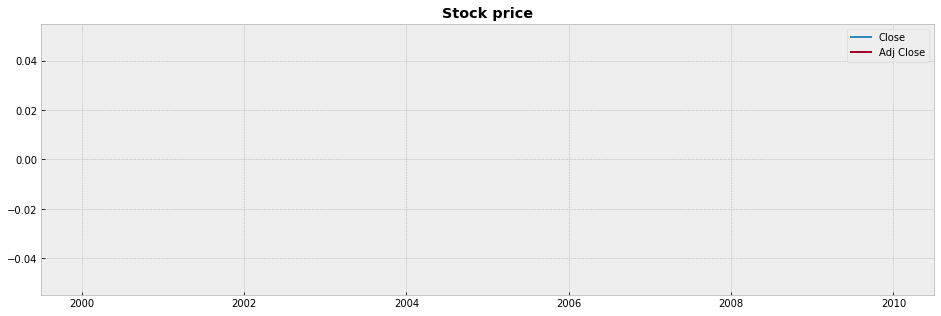

In [27]:
plot_fields =  ['Close', 'Adj Close']

fig = plt.figure(figsize=(16, 5))

plt.plot(prices_intraday.loc[idx ,plot_fields])
plt.legend(plot_fields)

plt.title("Stock price", weight="bold")

plt.show()

In [23]:
prices_intraday['date'] = prices_intraday.index.date

prices_intraday.head()

,Open,High,Low,Close,Adj Close,Volume,date
Datetime,,,,,,,
2021-01-15 09:30:00-05:00,852.00,854.51,850.12,854.45,854.45,1829208,2021-01-15
2021-01-15 09:31:00-05:00,854.35,858.80,853.26,858.65,858.65,348294,2021-01-15
2021-01-15 09:32:00-05:00,858.58,858.82,855.09,857.89,857.89,212477,2021-01-15
2021-01-15 09:33:00-05:00,857.89,859.90,856.30,857.59,857.59,263226,2021-01-15
2021-01-15 09:34:00-05:00,856.00,856.00,853.05,854.42,854.42,201025,2021-01-15


In [24]:
prices_intraday.groupby('date')['Open'].first()

date
2021-01-15    852.00
2021-01-19    837.80
2021-01-20    858.74
2021-01-21    855.00
2021-01-22    834.31
Name: Open, dtype: float64

In [25]:
prices_intraday.groupby('date')['Close'].last()

date
2021-01-15    826.06
2021-01-19    844.50
2021-01-20    850.65
2021-01-21    844.97
2021-01-22    846.50
Name: Close, dtype: float64

In [26]:
prices.tail()

,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits
Date,,,,,,,,
2021-01-11,849.40,854.43,803.62,811.19,811.19,59554100,0,0.0
2021-01-12,831.00,868.00,827.34,849.44,849.44,46270700,0,0.0
2021-01-13,852.76,860.47,832.00,854.41,854.41,33312500,0,0.0
2021-01-14,843.39,863.00,838.75,845.00,845.00,31266300,0,0.0
2021-01-15,852.00,859.90,819.10,826.16,826.16,38777600,0,0.0


## Finam

https://www.finam.ru/quote/akcii-usa-bats/tesla-inc_tsla/

In [27]:
prices_intraday_finam = pd.read_csv('data/US1.TSLA_200101_210118_v2.csv', )

idx = prices_intraday_finam['<TIME>'] > 0
prices_intraday_finam = prices_intraday_finam.loc[idx]

prices_intraday_finam.head()

,<TICKER>,<PER>,<DATE>,<TIME>,<OPEN>,<HIGH>,<LOW>,<CLOSE>,<VOL>
0,US1.TSLA,1,20200102,173100,424.990,427.34,424.39,427.09,6700
1,US1.TSLA,1,20200102,173200,427.350,427.39,425.60,426.51,2936
2,US1.TSLA,1,20200102,173300,426.620,426.62,425.59,426.02,4121
3,US1.TSLA,1,20200102,173400,426.495,428.00,426.31,427.75,5942
4,US1.TSLA,1,20200102,173500,427.750,427.99,425.88,426.00,4591


In [28]:
pd.to_datetime(prices_intraday_finam['<DATE>'], format='%Y%m%d')

0       2020-01-02
1       2020-01-02
2       2020-01-02
3       2020-01-02
4       2020-01-02
           ...    
98720   2021-01-15
98721   2021-01-15
98722   2021-01-15
98723   2021-01-15
98724   2021-01-15
Name: <DATE>, Length: 98631, dtype: datetime64[ns]

In [29]:
# prices_intraday_finam['<TIME>'] = prices_intraday_finam['<TIME>'].astype(str)
# prices_intraday_finam['<TIME>'] = prices_intraday_finam['<TIME>'].replace({"0": "000000"})

pd.to_datetime(prices_intraday_finam['<TIME>'], format='%H%M%S')

0       1900-01-01 17:31:00
1       1900-01-01 17:32:00
2       1900-01-01 17:33:00
3       1900-01-01 17:34:00
4       1900-01-01 17:35:00
                ...        
98720   1900-01-01 23:55:00
98721   1900-01-01 23:56:00
98722   1900-01-01 23:57:00
98723   1900-01-01 23:58:00
98724   1900-01-01 23:59:00
Name: <TIME>, Length: 98631, dtype: datetime64[ns]

In [30]:
prices_intraday_finam['time'] = prices_intraday_finam['<DATE>'] * 10**6 + prices_intraday_finam['<TIME>']

prices_intraday_finam['time']

0        20200102173100
1        20200102173200
2        20200102173300
3        20200102173400
4        20200102173500
              ...      
98720    20210115235500
98721    20210115235600
98722    20210115235700
98723    20210115235800
98724    20210115235900
Name: time, Length: 98631, dtype: int64

In [31]:
prices_intraday_finam['time'] = pd.to_datetime(prices_intraday_finam['time'], format='%Y%m%d%H%M%S')

In [32]:
prices_intraday_finam = prices_intraday_finam.set_index('time')

prices_intraday_finam.head()

,<TICKER>,<PER>,<DATE>,<TIME>,<OPEN>,<HIGH>,<LOW>,<CLOSE>,<VOL>
time,,,,,,,,,
2020-01-02 17:31:00,US1.TSLA,1,20200102,173100,424.990,427.34,424.39,427.09,6700
2020-01-02 17:32:00,US1.TSLA,1,20200102,173200,427.350,427.39,425.60,426.51,2936
2020-01-02 17:33:00,US1.TSLA,1,20200102,173300,426.620,426.62,425.59,426.02,4121
2020-01-02 17:34:00,US1.TSLA,1,20200102,173400,426.495,428.00,426.31,427.75,5942
2020-01-02 17:35:00,US1.TSLA,1,20200102,173500,427.750,427.99,425.88,426.00,4591


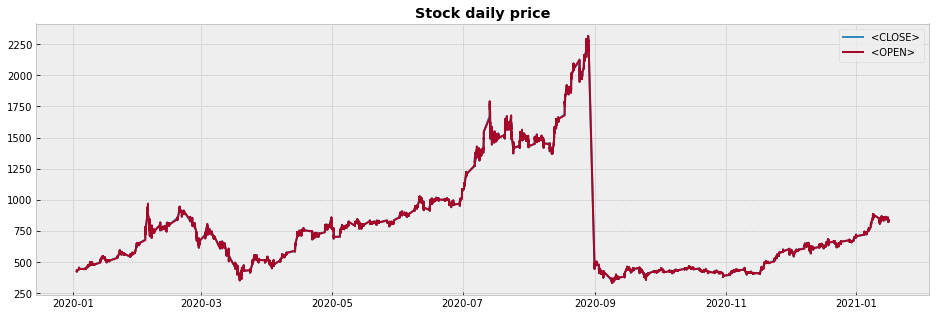

In [33]:
plot_fields =  ['<CLOSE>', '<OPEN>']

fig = plt.figure(figsize=(16, 5))

plt.plot(prices_intraday_finam[plot_fields])
plt.legend(plot_fields)

plt.title("Stock daily price", weight="bold")

plt.show()

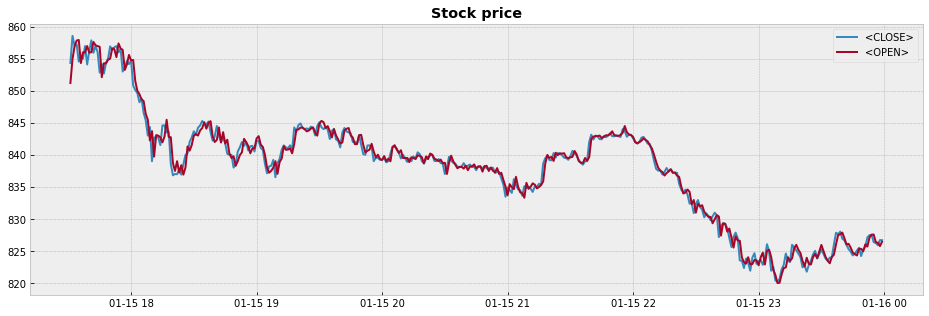

In [36]:
idx = prices_intraday_finam.index.date == date(2021, 1, 15)

plot_fields =  ['<CLOSE>', '<OPEN>']

fig = plt.figure(figsize=(16, 5))

plt.plot(prices_intraday_finam.loc[idx ,plot_fields])
plt.legend(plot_fields)

plt.title("Stock price", weight="bold")

plt.show()

## Finnhub

https://github.com/Finnhub-Stock-API/finnhub-python

https://finnhub.io/

You have 60 API calls/minute for free

In [150]:
# !pip install finnhub-python

In [37]:
import finnhub

with open('finnhub_api_key.txt', 'r') as file:
    finnhub_api_key = file.read()

# Setup client
finnhub_client = finnhub.Client(api_key=finnhub_api_key)

In [38]:
start_date = date(2020,1,1)
end_date = date(2021,1,1)

In [39]:
int(time.mktime(start_date.timetuple()))

1577826000

In [40]:
prices_daily = finnhub_client.stock_candles(
    symbol='TSLA', 
    resolution='D', 
    _from=int(time.mktime(start_date.timetuple())), 
    to=int(time.mktime(end_date.timetuple())), 
)

prices_daily = pd.DataFrame(prices_daily)

prices_daily.head()

,c,h,l,o,s,t,v
0,83.666,84.25800,80.416,81.00006,ok,1577750400,10292456
1,86.052,86.13914,84.342,84.90000,ok,1577923200,9558386
2,88.602,90.80000,87.384,88.10000,ok,1578009600,17794697
3,90.308,90.31200,88.000,88.09400,ok,1578268800,10157499
4,93.812,94.32600,90.671,92.28000,ok,1578355200,18209138


Returns:
- o - List of open prices for returned candles.

- h - List of high prices for returned candles.

- l - List of low prices for returned candles.

- c - List of close prices for returned candles.

- v - List of volume data for returned candles.

- t - List of timestamp for returned candles.

- s - Status of the response. This field can either be ok or no_data.

In [41]:
prices_daily['time'] = prices_daily['t'].apply(lambda x: datetime.utcfromtimestamp(x))

prices_daily = prices_daily.set_index('time')

prices_daily.head()

,c,h,l,o,s,t,v
time,,,,,,,
2019-12-31,83.666,84.25800,80.416,81.00006,ok,1577750400,10292456
2020-01-02,86.052,86.13914,84.342,84.90000,ok,1577923200,9558386
2020-01-03,88.602,90.80000,87.384,88.10000,ok,1578009600,17794697
2020-01-06,90.308,90.31200,88.000,88.09400,ok,1578268800,10157499
2020-01-07,93.812,94.32600,90.671,92.28000,ok,1578355200,18209138


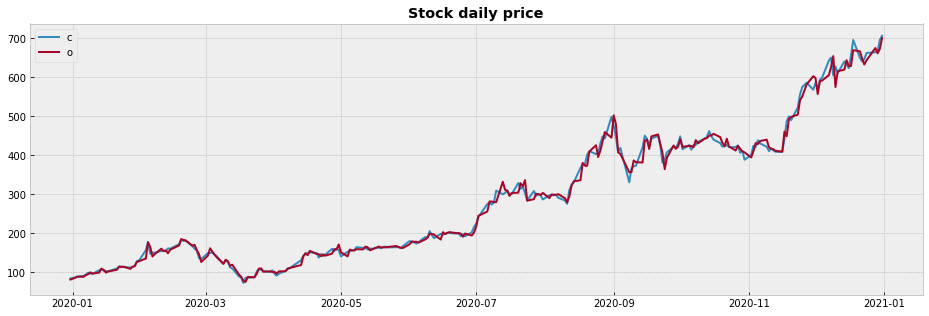

In [42]:
plot_fields =  ['c', 'o']

fig = plt.figure(figsize=(16, 5))

plt.plot(prices_daily[plot_fields])
plt.legend(plot_fields)

plt.title("Stock daily price", weight="bold")

plt.show()

In [43]:
prices_daily = finnhub_client.stock_candles(
    symbol='TSLA', 
    resolution='1', 
    _from=int(time.mktime(start_date.timetuple())), 
    to=int(time.mktime(end_date.timetuple())), 
)

prices_daily = pd.DataFrame(prices_daily)

prices_daily.head()

,c,h,l,o,s,t,v
0,584.80,585.25,584.50,585.25,ok,1606856400,471605
1,584.69,584.90,584.69,584.90,ok,1606856460,5482
2,584.76,584.90,584.00,584.50,ok,1606856520,4026
3,585.15,585.15,584.00,584.31,ok,1606856580,7757
4,585.20,585.26,585.17,585.17,ok,1606856640,286219


In [44]:
prices_daily['time'] = prices_daily['t'].apply(lambda x: datetime.utcfromtimestamp(x))

prices_daily = prices_daily.set_index('time')

prices_daily.head()

,c,h,l,o,s,t,v
time,,,,,,,
2020-12-01 21:00:00,584.80,585.25,584.50,585.25,ok,1606856400,471605
2020-12-01 21:01:00,584.69,584.90,584.69,584.90,ok,1606856460,5482
2020-12-01 21:02:00,584.76,584.90,584.00,584.50,ok,1606856520,4026
2020-12-01 21:03:00,585.15,585.15,584.00,584.31,ok,1606856580,7757
2020-12-01 21:04:00,585.20,585.26,585.17,585.17,ok,1606856640,286219


In [45]:
prices_daily.shape

(16217, 7)

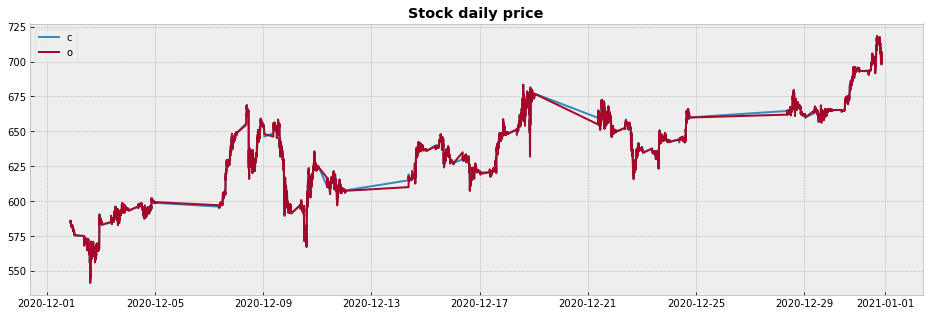

In [46]:
plot_fields =  ['c', 'o']

fig = plt.figure(figsize=(16, 5))

plt.plot(prices_daily[plot_fields])
plt.legend(plot_fields)

plt.title("Stock daily price", weight="bold")

plt.show()

In [47]:
# Aggregate Indicators
print(finnhub_client.aggregate_indicator('TSLA', 'D'))

{'technicalAnalysis': {'count': {'buy': 7, 'neutral': 9, 'sell': 1}, 'signal': 'buy'}, 'trend': {'adx': 42.18154460092849, 'trending': True}}


In [48]:
# Basic financials
print(finnhub_client.company_basic_financials('TSLA', 'margin'))

{'metric': {'freeOperatingCashFlow/revenue5Y': -10.34128, 'freeOperatingCashFlow/revenueTTM': 6.48424, 'grossMargin5Y': 18.67445, 'grossMarginAnnual': 16.55546, 'grossMarginTTM': 21.13501, 'netProfitMargin5Y': -7.2878, 'netProfitMarginAnnual': -3.15323, 'netProfitMarginTTM': 2.47729, 'operatingMargin5Y': -5.04491, 'operatingMarginAnnual': -0.28074, 'operatingMarginTTM': 6.31034, 'pretaxMargin5Y': -7.99014, 'pretaxMarginAnnual': -2.70567, 'pretaxMarginTTM': 3.36811}, 'metricType': 'margin', 'symbol': 'TSLA'}


In [49]:
# Earnings surprises
print(finnhub_client.company_earnings('TSLA', limit=5))

[{'actual': 0.76, 'estimate': 0.6003006, 'period': '2020-09-30', 'symbol': 'TSLA'}, {'actual': 0.436, 'estimate': -0.026703599999999997, 'period': '2020-06-30', 'symbol': 'TSLA'}, {'actual': 0.228, 'estimate': -0.021573, 'period': '2020-03-31', 'symbol': 'TSLA'}, {'actual': 0.412, 'estimate': 0.3516756, 'period': '2019-12-31', 'symbol': 'TSLA'}]


In [50]:
# Company Executives

news = finnhub_client.company_news('TSLA', _from="2020-06-01", to="2020-06-10")

news[1]

{'category': 'company',
 'datetime': 1591833600,
 'headline': "General Motors' Electric Vehicle Unit Hires Former Tesla Head Of Vehicle Safety",
 'id': 1424308,
 'image': 'https://cdn.benzinga.com/files/imagecache/og_image_social_share_1200x630/images/story/2012/gm_0.jpeg',
 'related': 'TSLA',
 'source': 'https://www.benzinga.com',
 'summary': 'General Motors Company (NYSE: GM) has hired a former Tesla Inc. (NASDAQ: TSLA) engineer, Louise Zhang,\xa0as the new vice president of product safety at Cruise, its self-driving...',
 'url': 'https://www.benzinga.com/news/20/06/16229122/general-motors-electric-vehicle-unit-hires-former-tesla-head-of-vehicle-safety'}

In [52]:
print(finnhub_client.company_executive('AAPL'))

FinnhubAPIException: FinnhubAPIException(status_code: 401): You don't have access to this resource.

In [51]:
news

[{'category': 'company',
  'datetime': 1591833600,
  'headline': 'Ford Recalls 2.5M Cars In The US As Faulty Door Latch Can Potentially Cause Injury',
  'id': 10980366,
  'image': 'https://cdn.benzinga.com/files/imagecache/og_image_social_share_1200x630/images/story/2012/screenshot_2020-06-11_at_07.25.58.png',
  'related': 'TSLA',
  'source': 'https://www.benzinga.com',
  'summary': 'The Ford Motor Company (NYSE: F) on Wednesday announced\xa0it was recalling about 2.5 million vehicles in the United States due to safety lapses.\nWhat Happened\nThe Detroit-based...',
  'url': 'https://www.benzinga.com/news/20/06/16229631/ford-recalls-2-5m-cars-in-the-us-as-faulty-door-latch-can-potentially-cause-injury'},
 {'category': 'company',
  'datetime': 1591833600,
  'headline': "General Motors' Electric Vehicle Unit Hires Former Tesla Head Of Vehicle Safety",
  'id': 1424308,
  'image': 'https://cdn.benzinga.com/files/imagecache/og_image_social_share_1200x630/images/story/2012/gm_0.jpeg',
  'rela

In [201]:
news[1]['summary']

'General Motors Company (NYSE: GM) has hired a former Tesla Inc. (NASDAQ: TSLA) engineer, Louise Zhang,\xa0as the new vice president of product safety at Cruise, its self-driving...'

# Bond market data sources

## Finam

https://bonds.finam.ru/issue/details0288D00001/default.asp

In [53]:
coupon_data = pd.read_excel('data/mts_bond.xlsx')

coupon_data

,№,Дата,Ставка,"Купоны, %","Купоны,Размер","Погашение, %от","Погашение,Размер"
0,1,21.05.2020,"6,6%","1,645","16,45RUR",NaN,NaN
1,2,20.08.2020,"6,6%","1,645","16,45RUR",NaN,NaN
2,3,19.11.2020,"6,6%","1,645","16,45RUR",NaN,NaN
3,4,18.02.2021,"6,6%","1,645","16,45RUR",NaN,NaN
4,5,20.05.2021,"6,6%","1,645","16,45RUR",NaN,NaN
5,6,19.08.2021,"6,6%","1,645","16,45RUR",NaN,NaN
6,7,18.11.2021,"6,6%","1,645","16,45RUR",NaN,NaN
7,8,17.02.2022,"6,6%","1,645","16,45RUR",NaN,NaN
8,9,19.05.2022,"6,6%","1,645","16,45RUR",NaN,NaN
9,10,18.08.2022,"6,6%","1,645","16,45RUR",NaN,NaN


In [54]:
coupon_data.columns = ['number', 'date', 'coupon_rate', 'coupon_percent', 'coupon',
       'face_value_percent', 'face_value']

coupon_data['coupon'] = coupon_data['coupon'].str.replace(',', '.')
coupon_data['coupon'] = coupon_data['coupon'].str.extract(r'(\d+.\d+)').astype('float')

coupon_data['face_value'] = coupon_data['face_value'].str.extract(r'(\d+.\d+)').astype('float')
coupon_data['face_value'] = coupon_data['face_value'] .fillna(0)

coupon_data.tail()

,number,date,coupon_rate,coupon_percent,coupon,face_value_percent,face_value
23,24,12.02.2026,"6,6%","1,645",16.45,NaN,0.0
24,25,14.05.2026,"6,6%","1,645",16.45,NaN,0.0
25,26,13.08.2026,"6,6%","1,645",16.45,NaN,0.0
26,27,12.11.2026,"6,6%","1,645",16.45,NaN,0.0
27,28,11.02.2027,"6,6%","1,645",16.45,100.0,1000.0


In [55]:
coupon_data['date'] = pd.to_datetime(coupon_data['date'], format='%d.%m.%Y')

In [69]:
r = 0.06
current_date = date(2021, 1, 15)

In [70]:
coupon_data['days_till_payment'] = (coupon_data['date'].dt.date - current_date).dt.days

coupon_data['will_be_paid'] = coupon_data['days_till_payment'] > 0

coupon_data.loc[~coupon_data['will_be_paid'], 'days_till_payment'] = 0

coupon_data['discount_factor'] = np.power( 1 / (1 + r) , coupon_data['days_till_payment']/365)

coupon_data.head(10)

,number,date,coupon_rate,coupon_percent,coupon,face_value_percent,face_value,days_till_payment,will_be_paid,discount_factor
0,1,2020-05-21,"6,6%","1,645",16.45,NaN,0.0,0,False,1.000000
1,2,2020-08-20,"6,6%","1,645",16.45,NaN,0.0,0,False,1.000000
2,3,2020-11-19,"6,6%","1,645",16.45,NaN,0.0,0,False,1.000000
3,4,2021-02-18,"6,6%","1,645",16.45,NaN,0.0,34,True,0.994587
4,5,2021-05-20,"6,6%","1,645",16.45,NaN,0.0,125,True,0.980243
5,6,2021-08-19,"6,6%","1,645",16.45,NaN,0.0,216,True,0.966105
6,7,2021-11-18,"6,6%","1,645",16.45,NaN,0.0,307,True,0.952172
7,8,2022-02-17,"6,6%","1,645",16.45,NaN,0.0,398,True,0.938439
8,9,2022-05-19,"6,6%","1,645",16.45,NaN,0.0,489,True,0.924905
9,10,2022-08-18,"6,6%","1,645",16.45,NaN,0.0,580,True,0.911566


In [71]:
coupon_data['coupon'] * coupon_data['will_be_paid'] * coupon_data['discount_factor']

0      0.000000
1      0.000000
2      0.000000
3     16.360955
4     16.124992
5     15.892433
6     15.663227
7     15.437327
8     15.214685
9     14.995255
10    14.778988
11    14.565841
12    14.355768
13    14.148725
14    13.944668
15    13.743554
16    13.545340
17    13.349985
18    13.157447
19    12.967687
20    12.780663
21    12.596336
22    12.414668
23    12.235620
24    12.059154
25    11.885233
26    11.713821
27    11.544880
dtype: float64

In [66]:
coupon_data['face_value'] * coupon_data['will_be_paid'] * coupon_data['discount_factor']

0       0.000000
1       0.000000
2       0.000000
3       0.000000
4       0.000000
5       0.000000
6       0.000000
7       0.000000
8       0.000000
9       0.000000
10      0.000000
11      0.000000
12      0.000000
13      0.000000
14      0.000000
15      0.000000
16      0.000000
17      0.000000
18      0.000000
19      0.000000
20      0.000000
21      0.000000
22      0.000000
23      0.000000
24      0.000000
25      0.000000
26      0.000000
27    743.427677
dtype: float64

In [67]:
(coupon_data['coupon'] + coupon_data['face_value']) * coupon_data['discount_factor'] * coupon_data['will_be_paid']

0       0.000000
1       0.000000
2       0.000000
3      16.375407
4      16.177421
5      15.981829
6      15.788602
7      15.597711
8      15.409127
9      15.222824
10     15.038774
11     14.856948
12     14.677321
13     14.499866
14     14.324556
15     14.151366
16     13.980270
17     13.811242
18     13.644258
19     13.479293
20     13.316323
21     13.155322
22     12.996269
23     12.839138
24     12.683907
25     12.530553
26     12.379053
27    755.657062
dtype: float64

In [72]:
bond_value_dummy = ((coupon_data['coupon'] + coupon_data['face_value']) * coupon_data['discount_factor']).sum()

bond_value_dummy

1096.643690501714

## Bloomberg

In [73]:
data_bonds = pd.read_excel('data/Extract1_ListQuotes1_one_bond.xlsx', parse_dates=['Date'], index_col=0)

data_bonds = data_bonds.dropna()

data_bonds.head()

,RU000A101FH6
Date,
2020-02-20,100.40
2020-02-21,100.39
2020-02-25,100.00
2020-02-26,100.02
2020-02-27,99.49


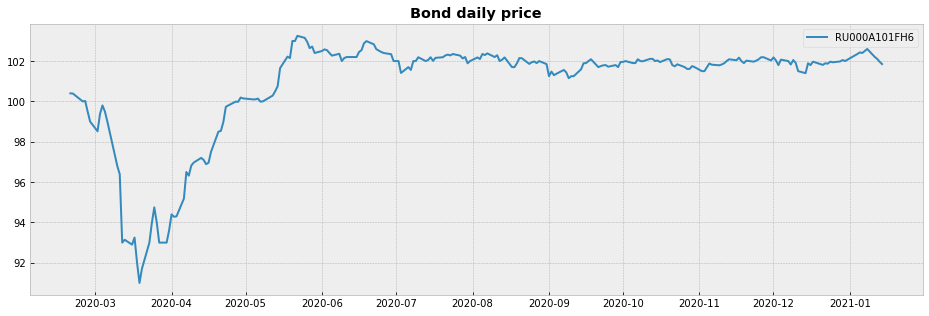

In [74]:
plot_fields =  ['RU000A101FH6']

fig = plt.figure(figsize=(16, 5))

plt.plot(data_bonds[plot_fields])
plt.legend(plot_fields)

plt.title("Bond daily price", weight="bold")

plt.show()

# Probably won't be included

## Cbonds

https://cbonds.ru/bonds/682351/

https://www.moex.com/ru/issue.aspx?code=RU000A101FH6&board=



https://quant.stackexchange.com/questions/36532/pricing-a-fixed-rate-bond-in-quantlib-python


https://pypi.org/project/qfrm/